# Grupo 7: Trabajo Final

### Pregunta 1: Modelos lineales

In [44]:
import pandas as pd
import numpy as np
import re 
from tqdm import tqdm  # controlar el tiempo en un loop
import os

#plots library

import matplotlib.pyplot as plt
import seaborn as sns

# import linear models library

import statsmodels.api as sm  # linear regression utiliza todas las columnas de base de datos 
import statsmodels.formula.api as smf  # linear regression usa uan formula
from sklearn import datasets, linear_model # models 
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

#!pip install statsmodels
# instalar stsatmodels 

# Export latex table 

from pystout import pystout

user = os.getlogin()   # Username
os.chdir(f"/Users/{user}/Documents/GitHub/") # Set directorio

##### Importamos la data

In [4]:
data = pd.read_stata(r"/Users/henryandreumarquezsalinas/Documents/GitHub/First-Repository/Trabajo Final/mss_repdata.dta", convert_categoricals=False) # importamos la data sin leer las etiquetas de valor

In [5]:
data #mostramos su contenido

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552.0,1995-01-01,Zimbabwe,ZWE,493.448456,465.000092,680.722412,0.061179,-0.316902,0.513642,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
739,552.0,1996-01-01,Zimbabwe,ZWE,746.904236,493.448456,465.000092,0.513642,0.061179,0.044380,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
740,552.0,1997-01-01,Zimbabwe,ZWE,780.051941,746.904236,493.448456,0.044380,0.513642,-0.181482,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
741,552.0,1998-01-01,Zimbabwe,ZWE,638.486389,780.051941,746.904236,-0.181482,0.044380,0.094420,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0


### Tabla estadística

In [6]:
data.describe() # summmary statistics

,ccode,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,GPCP_d,GPCP_d_l,GPCP_df_mean,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,...,306.000000,486.000000,207.000000,116.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,496.090175,1001.638367,1003.438232,1011.417664,0.018195,0.011271,0.014972,-1.799895,-7.979191,2.817983,...,0.941176,0.563786,0.289855,0.241379,0.308659,0.283760,0.784657,0.381561,0.387307,0.321669
std,54.073587,501.701569,503.437897,507.009064,0.209413,0.206667,0.210656,163.680740,162.302673,140.732239,...,0.839479,0.650967,0.454795,0.429776,0.208902,0.270551,0.402225,0.263969,0.264519,0.467431
min,404.000000,96.109329,96.109329,96.109329,-0.549871,-0.549871,-0.549871,-533.259277,-533.259277,-616.048950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,439.000000,604.394287,603.072571,603.072571,-0.111882,-0.113888,-0.116874,-100.257599,-107.398376,-77.643036,...,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,1.000000,0.250000,0.250356,0.000000
50%,484.000000,973.716675,974.396118,994.367065,0.005001,-0.003716,0.003101,4.352180,-4.347000,-2.355499,...,1.000000,0.000000,0.000000,0.000000,0.333333,0.166667,1.000000,0.500000,0.500712,0.000000
75%,541.000000,1364.301880,1368.976746,1370.415955,0.119282,0.109747,0.117031,100.697357,92.876343,82.415497,...,2.000000,1.000000,1.000000,0.000000,0.500000,0.333333,1.000000,0.500000,0.500712,1.000000
max,625.000000,2587.637207,2587.637207,2587.637207,1.676976,1.676976,1.676976,554.971313,554.971313,469.453796,...,2.000000,2.000000,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,1.001425,1.000000


In [7]:
# Tipo de variables

data.info()

data.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 742
Columns: 200 entries, ccode to soc
dtypes: datetime64[ns](1), float32(104), float64(78), int32(9), int8(5), object(3)
memory usage: 813.4+ KB


ccode                  float64
year            datetime64[ns]
country_name            object
country_code            object
GPCP                   float32
                     ...      
fh_pol                 float64
S                      float32
W                      float32
WoverS                 float32
soc                    float32
Length: 200, dtype: object

In [8]:
# Extraer year
# con .month se puede extraer el mes 
# con .day se puede extraer el día 

data['time_year'] = pd.DatetimeIndex(data['year']).year - 1978
data['time_year']

0       3
1       4
2       5
3       6
4       7
       ..
738    17
739    18
740    19
741    20
742    21
Name: time_year, Length: 743, dtype: int64

In [9]:
dummys = pd.get_dummies(data["ccode"].astype(int), prefix = "ccode", dummy_na=False)
dummys.columns

# se convierte a entero repdata["ccode"].astype(int)

# ccode: código por país 

# dummy_na=False 

# capturar varibbles omitidas invariantes de cada país 

Index(['ccode_404', 'ccode_420', 'ccode_432', 'ccode_433', 'ccode_434',
       'ccode_435', 'ccode_436', 'ccode_437', 'ccode_438', 'ccode_439',
       'ccode_450', 'ccode_451', 'ccode_452', 'ccode_461', 'ccode_471',
       'ccode_475', 'ccode_481', 'ccode_482', 'ccode_483', 'ccode_484',
       'ccode_490', 'ccode_500', 'ccode_501', 'ccode_510', 'ccode_516',
       'ccode_517', 'ccode_520', 'ccode_522', 'ccode_530', 'ccode_540',
       'ccode_541', 'ccode_551', 'ccode_552', 'ccode_553', 'ccode_560',
       'ccode_565', 'ccode_570', 'ccode_571', 'ccode_572', 'ccode_580',
       'ccode_625'],
      dtype='object')

In [10]:
len(dummys.columns)

41

In [11]:
dummys

,ccode_404,ccode_420,ccode_432,ccode_433,ccode_434,ccode_435,ccode_436,ccode_437,ccode_438,ccode_439,...,ccode_551,ccode_552,ccode_553,ccode_560,ccode_565,ccode_570,ccode_571,ccode_572,ccode_580,ccode_625
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
739,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
740,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
741,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
data = pd.concat([ data , dummys], axis = 1 ) # concantenar ambas bases de datos de manera horizontal

In [13]:
data

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,ccode_551,ccode_552,ccode_553,ccode_560,ccode_565,ccode_570,ccode_571,ccode_572,ccode_580,ccode_625
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0,0,0,0,0,0,0,0,0,0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0,0,0,0,0,0,0,0,0,0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0,0,0,0,0,0,0,0,0,0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0,0,0,0,0,0,0,0,0,0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552.0,1995-01-01,Zimbabwe,ZWE,493.448456,465.000092,680.722412,0.061179,-0.316902,0.513642,...,0,1,0,0,0,0,0,0,0,0
739,552.0,1996-01-01,Zimbabwe,ZWE,746.904236,493.448456,465.000092,0.513642,0.061179,0.044380,...,0,1,0,0,0,0,0,0,0,0
740,552.0,1997-01-01,Zimbabwe,ZWE,780.051941,746.904236,493.448456,0.044380,0.513642,-0.181482,...,0,1,0,0,0,0,0,0,0,0
741,552.0,1998-01-01,Zimbabwe,ZWE,638.486389,780.051941,746.904236,-0.181482,0.044380,0.094420,...,0,1,0,0,0,0,0,0,0,0


In [14]:
# Creación del trend_country effects : multiplicación de las dummy por país y la variable temporal 

i = 0 

while i < 41:  # 41 por el tema de indexing pues en python la posición inicial es cero. 
    var = dummys.columns[i]+"_"+"time"  # creamos el nombre de cada variable
    data[var]  = data[dummys.columns[i]]*data["time_year"] 
    
    # multiplicación de variables: dummy país * variable temporal

    i = i + 1

In [15]:
# observamos para país y la variable temporal 

data[['ccode','time_year']].iloc[0:40,:]


,ccode,time_year
0,540.0,3
1,540.0,4
2,540.0,5
3,540.0,6
4,540.0,7
5,540.0,8
6,540.0,9
7,540.0,10
8,540.0,11
9,540.0,12


In [16]:
# Seleccionamos las variables para las estadísticas descriptivas

table1 = data.loc[:,["NDVI_g","tot_100", "trade_pGDP","pop_den_rur", "land_crop",
                        "va_agr", "va_ind_manf"]]

# selccionamos los estadísticos de interés: media, error estándar y cantidad de observaciones

summary_table = table1.describe().loc[["mean","std","count"]]
summary_table

,NDVI_g,tot_100,trade_pGDP,pop_den_rur,land_crop,va_agr,va_ind_manf
mean,0.009282,109.877568,64.252421,324.816053,1.979464,32.181401,11.117373
std,0.093208,34.684560,34.291007,193.093648,3.373026,15.166560,6.262198
count,646.000000,668.000000,698.000000,720.000000,701.000000,702.000000,669.000000


In [18]:
summary_table = table1.describe().loc[["mean","std","count"]].T
# .t permite tranponer el DataFrame

# Personalizamos la tabla a crear

columns_nuevos_nombres = {
    "mean": "Mean",
    "std": "Standard Deviation",
    "count": "Observations",
}

# Renombramos las filas y las columnas
summary_table.rename(columns=columns_nuevos_nombres, inplace=True)

summary_table

,Mean,Standard Deviation,Observations
NDVI_g,0.009282,0.093208,646.0
tot_100,109.877568,34.684560,668.0
trade_pGDP,64.252421,34.291007,698.0
pop_den_rur,324.816053,193.093648,720.0
land_crop,1.979464,3.373026,701.0
va_agr,32.181401,15.166560,702.0
va_ind_manf,11.117373,6.262198,669.0


In [19]:
# Exportamos el DataFrame a LaTeX
# \ permite escribir código extenso en líneas diferentes

summary_table.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2)\
.format(subset="Observations", precision=0)\
.to_latex(
    "summary2.tex",
caption="Descriptive Statistics",
    column_format = "lccc"   # l: left, c:center , 
) 

# Formato de columnas

summary_table.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2).format(subset="Observations", precision=0)

# Así obtenemos la tabla de estadísticos solicitada #

,Mean,Standard Deviation,Observations
NDVI_g,0.01,0.09,646
tot_100,109.88,34.68,668
trade_pGDP,64.25,34.29,698
pop_den_rur,324.82,193.09,720
land_crop,1.98,3.37,701
va_agr,32.18,15.17,702
va_ind_manf,11.12,6.26,669


In [20]:
# Ahora podemos hacer la misma tabla, pero con otro formato

summary_table = table1.describe().loc[["mean","std","count"]].T
# .t permite tranponer el DataFrame

new_names = ["Tasa de variación del índice de vegetación","Términos de intercambio","Porcentaje de las exportaciones respecto al PBI",
"Densidad poblacional rural","Porcentaje de tierra cultivable en uso","Valor agregado del sector agricultura respecto al PBI", "Valor agregado del sector manufacturero respecto al PBI"]

# unión de listas bajo la estructura diccionario

dict( zip( table1.columns, new_names) )

{'NDVI_g': 'Tasa de variación del índice de vegetación',
 'tot_100': 'Términos de intercambio',
 'trade_pGDP': 'Porcentaje de las exportaciones respecto al PBI',
 'pop_den_rur': 'Densidad poblacional rural',
 'land_crop': 'Porcentaje de tierra cultivable en uso',
 'va_agr': 'Valor agregado del sector agricultura respecto al PBI',
 'va_ind_manf': 'Valor agregado del sector manufacturero respecto al PBI'}

In [21]:
# Personalizamos la nueva tabla

index_nuevos_nombres = dict( zip( table1.columns, new_names) )

columns_nuevos_nombres = {
    "mean": "Mean",
    "std": "Standard Deviation",
    "count": "Observations",
}

# Renombramos las filas y las columnas
summary_table.rename(index=index_nuevos_nombres, columns=columns_nuevos_nombres, inplace=True)

summary_table

,Mean,Standard Deviation,Observations
Tasa de variación del índice de vegetación,0.009282,0.093208,646.0
Términos de intercambio,109.877568,34.684560,668.0
Porcentaje de las exportaciones respecto al PBI,64.252421,34.291007,698.0
Densidad poblacional rural,324.816053,193.093648,720.0
Porcentaje de tierra cultivable en uso,1.979464,3.373026,701.0
Valor agregado del sector agricultura respecto al PBI,32.181401,15.166560,702.0
Valor agregado del sector manufacturero respecto al PBI,11.117373,6.262198,669.0


In [22]:
# Exportamos el DataFrame a LaTeX
# \ permite escribir código extenso en líneas diferentes

summary_table.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2)\
.format(subset="Observations", precision=0)\
.to_latex(
    "summary2.tex",
caption="Descriptive Statistics",
    column_format = "lccc"   # l: left, c:center , 
) 

In [23]:
# Formato de columnas

summary_table.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2).format(subset="Observations", precision=0)

# Así obtenemos la nueva tabla con los nombres en las filas cambiados #

,Mean,Standard Deviation,Observations
Tasa de variación del índice de vegetación,0.01,0.09,646
Términos de intercambio,109.88,34.68,668
Porcentaje de las exportaciones respecto al PBI,64.25,34.29,698
Densidad poblacional rural,324.82,193.09,720
Porcentaje de tierra cultivable en uso,1.98,3.37,701
Valor agregado del sector agricultura respecto al PBI,32.18,15.17,702
Valor agregado del sector manufacturero respecto al PBI,11.12,6.26,669


### Replicando la Tabla 3

In [24]:
y = data['any_prio']
z = data['war_prio']

# añadimos constante

X = sm.add_constant(data.loc[:,["GPCP_g", "GPCP_g_l"]])
X

,const,GPCP_g,GPCP_g_l
0,1.0,-0.079653,-0.107587
1,1.0,0.155680,-0.079653
2,1.0,-0.034482,0.155680
3,1.0,0.059925,-0.034482
4,1.0,-0.018277,0.059925
...,...,...,...
738,1.0,0.061179,-0.316902
739,1.0,0.513642,0.061179
740,1.0,0.044380,0.513642
741,1.0,-0.181482,0.044380


#### Modelo 1:

In [25]:
# country fixed effect

index_columns = np.where( data.columns.str.contains(
    '_time$'))[0]

# indice con nombre de variables que terminan con _time

country_trend = data.columns[index_columns] # se extrae el nombre de todas las variables que terminan con _time

country_trend 

Index(['ccode_404_time', 'ccode_420_time', 'ccode_432_time', 'ccode_433_time',
       'ccode_434_time', 'ccode_435_time', 'ccode_436_time', 'ccode_437_time',
       'ccode_438_time', 'ccode_439_time', 'ccode_450_time', 'ccode_451_time',
       'ccode_452_time', 'ccode_461_time', 'ccode_471_time', 'ccode_475_time',
       'ccode_481_time', 'ccode_482_time', 'ccode_483_time', 'ccode_484_time',
       'ccode_490_time', 'ccode_500_time', 'ccode_501_time', 'ccode_510_time',
       'ccode_516_time', 'ccode_517_time', 'ccode_520_time', 'ccode_522_time',
       'ccode_530_time', 'ccode_540_time', 'ccode_541_time', 'ccode_551_time',
       'ccode_552_time', 'ccode_553_time', 'ccode_560_time', 'ccode_565_time',
       'ccode_570_time', 'ccode_571_time', 'ccode_572_time', 'ccode_580_time',
       'ccode_625_time'],
      dtype='object')

In [32]:
# Planteamos el modelo

formula_model1 = "any_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )

model1 = smf.ols(formula_model1, data).fit(cov_type = 'cluster', cov_kwds={'groups': data['ccode']}).summary2().tables[1]

# Recolectamos los coeficientes

model1_coef = model1.iloc[41,0]
model1_coef_se = model1.iloc[41,1]
model1_lower = model1.iloc[41,4]
model1_upper = model1.iloc[41,5]

model1

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-0.245845,0.003671,-66.965163,0.000000e+00,-0.253041,-0.238650
C(ccode)[T.420.0],0.492085,0.001049,468.956054,0.000000e+00,0.490029,0.494142
C(ccode)[T.432.0],0.259995,0.007963,32.650975,7.761876e-234,0.244388,0.275602
C(ccode)[T.433.0],-0.098577,0.001671,-59.006641,0.000000e+00,-0.101851,-0.095302
C(ccode)[T.434.0],0.243756,0.004211,57.887597,0.000000e+00,0.235503,0.252009
...,...,...,...,...,...,...
ccode_570_time,0.014155,0.000141,100.113319,0.000000e+00,0.013878,0.014432
ccode_571_time,0.000222,0.000147,1.505819,1.321136e-01,-0.000067,0.000510
ccode_572_time,-0.000146,0.000058,-2.521110,1.169852e-02,-0.000259,-0.000032
ccode_580_time,-0.000180,0.000165,-1.087092,2.769961e-01,-0.000504,0.000144


In [47]:
# Hallamos el error medio cuadrado

formula_model1 = "any_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )

ols_model1 = smf.ols(formula_model1, data).fit(cov_type='cluster', cov_kwds={'groups': data['ccode']})
rmse_ol1 = round(mean_squared_error( y, ols_model1.predict())**0.5,2)

print(ols_model1.summary())
print(rmse_ol1)

                            OLS Regression Results                            
Dep. Variable:               any_prio   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     162.4
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           6.28e-20
Time:                        20:47:48   Log-Likelihood:                 8.6565
No. Observations:                 743   AIC:                             150.7
Df Residuals:                     659   BIC:                             538.0
Df Model:                          83                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2458      0.00

#### Modelo 2

In [34]:
# Planteamos el segundo modelo

formula_model2 = "war_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )

model2 = smf.ols(formula_model2, data).fit(cov_type = 'cluster', cov_kwds={'groups': data['ccode']}).summary2().tables[1]

# Recolectamos los coeficientes

model2_coef = model2.iloc[41,0]
model2_coef_se = model2.iloc[41,1]
model2_lower = model2.iloc[41,4]
model2_upper = model2.iloc[41,5]


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-0.110119,0.002447,-45.001513,0.000000e+00,-0.114916,-0.105323
C(ccode)[T.420.0],0.114857,0.000575,199.754284,0.000000e+00,0.113730,0.115983
C(ccode)[T.432.0],0.103349,0.005373,19.234850,1.890891e-82,0.092818,0.113880
C(ccode)[T.433.0],-0.002288,0.001034,-2.213479,2.686465e-02,-0.004314,-0.000262
C(ccode)[T.434.0],0.109586,0.002710,40.430691,0.000000e+00,0.104274,0.114899
...,...,...,...,...,...,...
ccode_570_time,-0.000126,0.000089,-1.418921,1.559221e-01,-0.000301,0.000048
ccode_571_time,0.000232,0.000101,2.298118,2.155509e-02,0.000034,0.000429
ccode_572_time,-0.000048,0.000031,-1.523572,1.276157e-01,-0.000109,0.000014
ccode_580_time,-0.000256,0.000115,-2.228624,2.583894e-02,-0.000481,-0.000031


In [48]:
# Hallamos el error medio cuadrado

formula_model2 = "war_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )

ols_model2 = smf.ols(formula_model2, data).fit(cov_type='cluster', cov_kwds={'groups': data['ccode']})
rmse_ol2 = round(mean_squared_error( y, ols_model2.predict())**0.5,2)

print(ols_model2.summary())
print(rmse_ol2)

                            OLS Regression Results                            
Dep. Variable:               war_prio   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     335.5
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.01e-25
Time:                        20:48:43   Log-Likelihood:                 124.86
No. Observations:                 743   AIC:                            -81.72
Df Residuals:                     659   BIC:                             305.6
Df Model:                          83                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1101      0.00

#### Elaboramos la tabla correspondiente

In [49]:
# Lista de explicativa a mostrarse en la tabla

explicativas = ['gdp_g', 'gdp_g_l']

# etiquetas a las variables 

etiquetas = ['Economic growth rate, t','Economic growth rate, t-1']


labels = dict(zip(explicativas,etiquetas))
labels 


{'gdp_g': 'Economic growth rate, t', 'gdp_g_l': 'Economic growth rate, t-1'}

In [50]:

pystout(models = [ols_model1,ols_model2], file='regression_table_2.tex', digits=3,
        endog_names=['OLS','OLS'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        mgroups={'Dependent Variable: Civil Conflict 25 Deaths (OLS)':[1,5],'Dependent Variable: Civil Conflict 1000 Deaths (OLS)':[2,5]}, # titulo a las regresiones
        modstat={'nobs':'Observarions','rsquared':'R\sym{2}'}, # estadísticos 
        addrows={'Country fixed effects':['yes','yes'], 'Country-specific time trends' :
                 ['yes','yes'],
                 'Root mean square error': [rmse_ol1,rmse_ol2]}, # añadimos filas 
        addnotes=['Note.—Huber robust standard errors are in parentheses.',
                  'Regression disturbance terms are clustered at the country level.',
                 'A country-specific year time trend is included in all specifications (coefficient estimates not reported).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Rainfall and Civil Conflict (Reduced-Form)',
        stars={.1:'*',.05:'**',.01:'***'}
       )


#### Elaboramos la tabla a emplear para el gráfico

In [51]:
table = np.zeros( ( 2, 4 ) )

table[0,0] = model1_coef
table[0,1] = model1_coef_se 
table[0,2] = model1_lower
table[0,3] = model1_upper 

table[1,0] = model2_coef
table[1,1] = model2_coef_se  
table[1,2] = model2_lower
table[1,3] = model2_upper 

table_pandas = pd.DataFrame( table, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])
table_pandas.index = [ "Modelo 1","Modelo 2"]

table_pandas.reset_index(inplace = True)
table_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table_pandas.round(8)

,Model,Estimate,Std. Error,Lower_bound,Upper_bound
0,Modelo 1,-0.023770,0.043224,-0.108488,0.060948
1,Modelo 2,-0.062476,0.029919,-0.121117,-0.003835


### Gráfico Coeft Plot

Text(0.5, 1.0, 'Coeficiente de la variable GDCP-g (95% CI)')

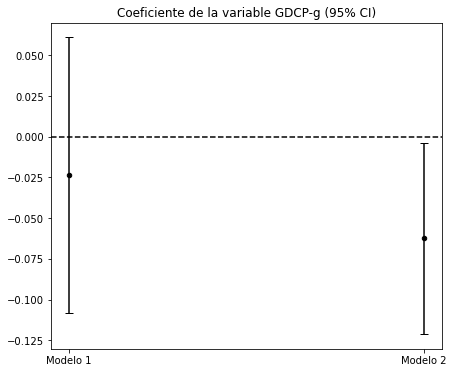

In [52]:

fig, ax = plt.subplots(figsize=(7, 6))

ax.scatter(x=table_pandas['Model'], 
         marker='o', s=20,  # s: modificar tamaño del point
         y=table_pandas['Estimate'], color = "black")

eb1 = plt.errorbar(x=table_pandas['Model'], y=table_pandas['Estimate'],
            yerr = 0.5*(table_pandas['Upper_bound']- table_pandas['Lower_bound']),
            color = 'black', ls='', capsize = 4)

# ls='': no une los puntos rojos 
#  yerr genera el gráfico del intervalo de confianza 

plt.axhline(y=0, color = 'black').set_linestyle('--')  # linea horizontal 
# Set title & labels
plt.title('Coeficiente de la variable GDCP-g (95% CI)',fontsize=12)
